### Name : Paras Karki
### Group : 6
### Student Id: 2050210

In [36]:
# imporr necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>Read the dataset

In [37]:
path = ('house_data.csv')
df = pd.read_csv(path)

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


<b> Data Visualization

In [39]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
count,2.157500e+04,21575.000000,21575.000000,21575.000000,2.157500e+04,21575.000000,21575.000000,21575.000000
mean,5.383716e+05,3.369826,2.113105,2076.706373,1.509372e+04,1.494276,1786.426559,1971.007416
std,3.642894e+05,0.929871,0.769125,915.433561,4.144629e+04,0.540089,826.457010,29.372485
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,1900.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,1190.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.611000e+03,1.500000,1560.000000,1975.000000
75%,6.412250e+05,4.000000,2.500000,2550.000000,1.066000e+04,2.000000,2210.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   sqft_above   21575 non-null  int64  
 7   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


### visualizing the corelation of each features

<AxesSubplot:>

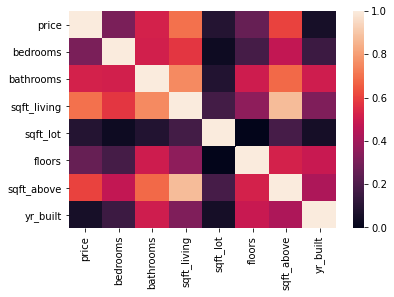

In [6]:
sns.heatmap(df.corr())

<b>We can observe from the corelation of features that the corelation of yr_built with target is around 0. So, we can drop the column.</p>

In [40]:
# Drop Column data cleaning
df.drop('yr_built',axis=1,inplace=True)

In [41]:
# Check dataset after cleaning.
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
0,221900.0,3,1.00,1180,5650,1.0,1180
1,538000.0,3,2.25,2570,7242,2.0,2170
2,180000.0,2,1.00,770,10000,1.0,770
3,604000.0,4,3.00,1960,5000,1.0,1050
4,510000.0,3,2.00,1680,8080,1.0,1680


<b> Separate Input and Output

In [42]:
X = df.drop('price',axis=1)
y = df['price']

<b> Split train and test data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
0,3,1.00,1180,5650,1.0,1180
1,3,2.25,2570,7242,2.0,2170
2,2,1.00,770,10000,1.0,770
3,4,3.00,1960,5000,1.0,1050
4,3,2.00,1680,8080,1.0,1680


In [26]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## Implement Random Forest Regressor with SK Learn

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# random forest model
rfr = RandomForestRegressor()

In [47]:
# fitting random forest model with training data.
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
# prediction value
y_pred = rfr.predict(X_test)

In [49]:
#calculating accuracy of Random Forest Regressor model
from sklearn import metrics
# RFR is random forest regressor
print('RFR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RFR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RFR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RFR Mean Absolute Error: 151581.08549051205
RFR Mean Squared Error: 58978076261.878685
RFR Root Mean Squared Error: 242854.02253592317


### Implementing Linear Regression with SK Learn

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# linear regression model
lr = LinearRegression()

In [52]:
# fitting linear regression model 
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
# prediction value
y_pred = lr.predict(X_test)

In [54]:
#calculating accuracy of Linear Regression model
from sklearn import metrics
# LR is linear regression
print('LR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('LR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('LR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LR Mean Absolute Error: 168631.5929031534
LR Mean Squared Error: 63238831841.06058
LR Root Mean Squared Error: 251473.3223247758


### Which algorithm gave best result?

<b> Linear regression and Random forest model for regression task is used. The result from both model is similar with small difference.  We can see the error of Linear Regression model is high and Random Forest Model is lower.

# Implement GridSearchCV for appropriate hyper parameters

### Implementing Random Forest Regressor using GridSearchCV 

In [55]:
#import necessary library
from sklearn.model_selection import GridSearchCV

In [56]:
#defining the parameters 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [57]:
# Random forest model
rfr = RandomForestRegressor(random_state=1)

In [58]:
#importing Random GridSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [60]:
g_search.fit(X_train, y_train);

In [61]:
#printing the best parameter 
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


We have the best parameters.

<b> Rebuild model with best parameters for Random Forest Regressor

In [62]:
# We have tuned the hyperparameters obtained form cross-validation.
rfr = RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 'auto', n_estimators= 15)

In [63]:
# fit model
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=15)

In [64]:
# prediction value
y_pred = rfr.predict(X_test)

In [65]:
#calculating accuracy after hyper-parameter tuning
from sklearn import metrics

print('Random Forest Tuned Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Random Forest Tuned Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Random Forest Tuned Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Tuned Mean Absolute Error: 150272.37386679085
Random Forest Tuned Mean Squared Error: 59334409357.84133
Random Forest Tuned Root Mean Squared Error: 243586.55414008658


<b>Conclusion

We have done cross validation using GridSearchCV for Random forest model. The error rate has decreased by tuing hyper parameters.